In [1]:
import cv2
import numpy as np
import matplotlib.pyplot  as plt
%matplotlib inline

In [2]:
def display(img, cmap='gray'):
    fig = plt.figure(figsize=(12, 10))
    ax = fig.add_subplot(111)
    ax.imshow(img, cmap='gray')

In [3]:
sep_coins = cv2.imread('../Images/pennies.jpg')

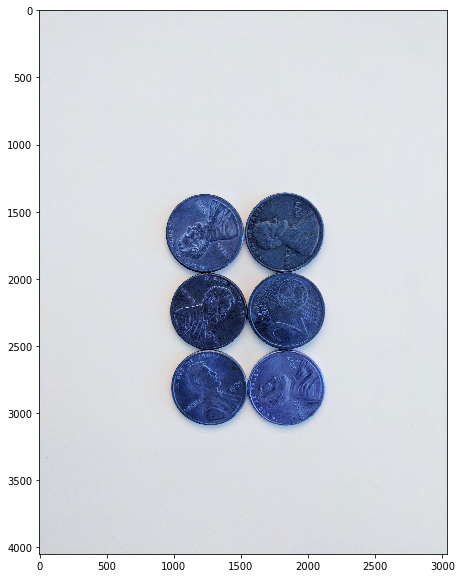

In [4]:
display(sep_coins)

# Apply median Blur 

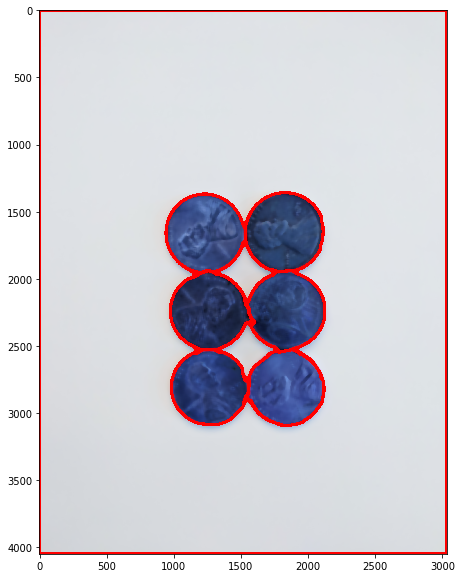

In [57]:
sep_blur = cv2.medianBlur(sep_coins, ksize=25)
display(sep_blur)

# Conver to GrayScale

In [7]:
gray_sep_coins = cv2.cvtColor(sep_blur, cv2.COLOR_BGR2GRAY)

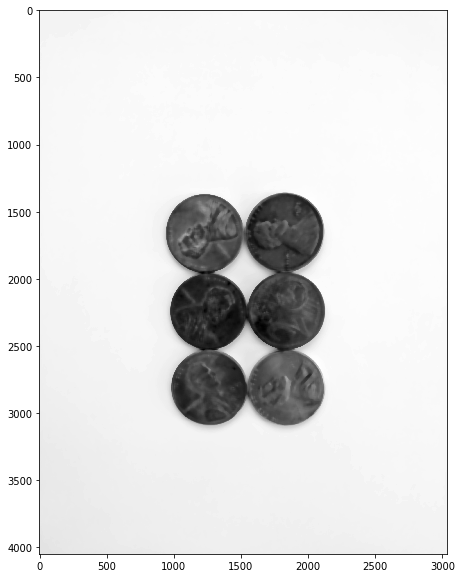

In [58]:
display(gray_sep_coins)

# Binary Thershold

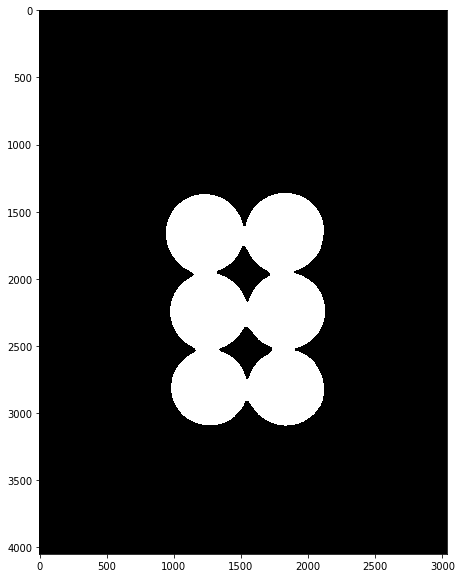

In [59]:
ret, sep_coins_thresh = cv2.threshold(gray_sep_coins, 160, 255, cv2.THRESH_BINARY_INV)
display(sep_coins_thresh)

# Find Contours

In [10]:
image, contours, hierarchy = cv2.findContours(sep_coins_thresh.copy(), cv2.RETR_CCOMP, cv2.CHAIN_APPROX_SIMPLE)

In [11]:
for i in range(len(contours)):
    if hierarchy[0][i][3] == -1:
        cv2.drawContours(sep_coins, contours, i, (255,0,0), 10)

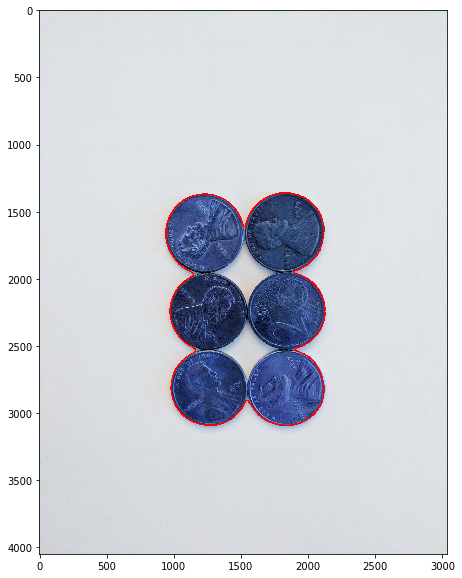

In [12]:
display(sep_coins)

# Watershed Algorithm

In [13]:
img = cv2.imread('../Images/pennies.jpg')

In [14]:
img = cv2.medianBlur(img, 35)

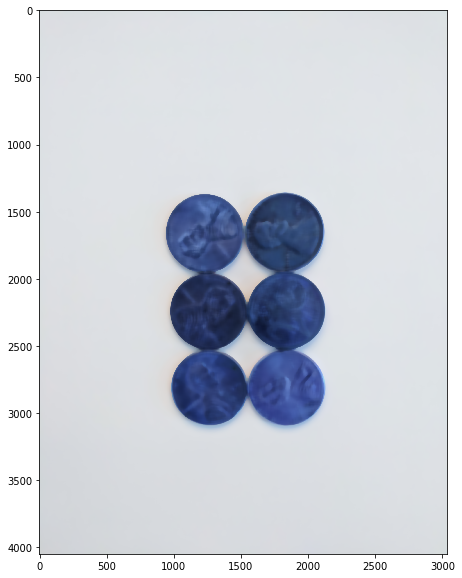

In [15]:
display(img)

In [16]:
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

In [21]:
ret, thresh = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)

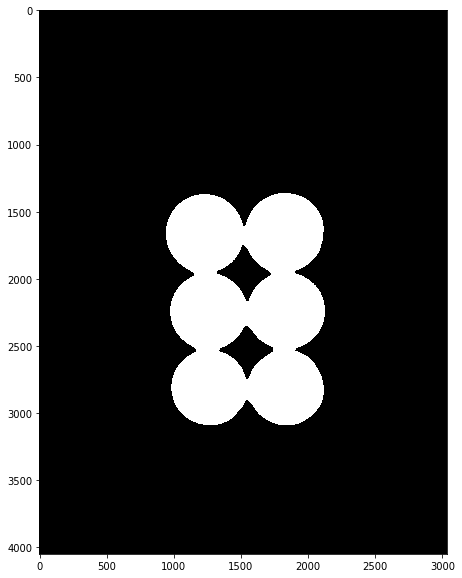

In [22]:
display(thresh)

In [24]:
# Noise Removal
kernel = np.ones((3, 3), np.uint8)
kernel

array([[1, 1, 1],
       [1, 1, 1],
       [1, 1, 1]], dtype=uint8)

In [25]:
opening = cv2.morphologyEx(thresh, cv2.MORPH_OPEN, kernel, iterations=2)

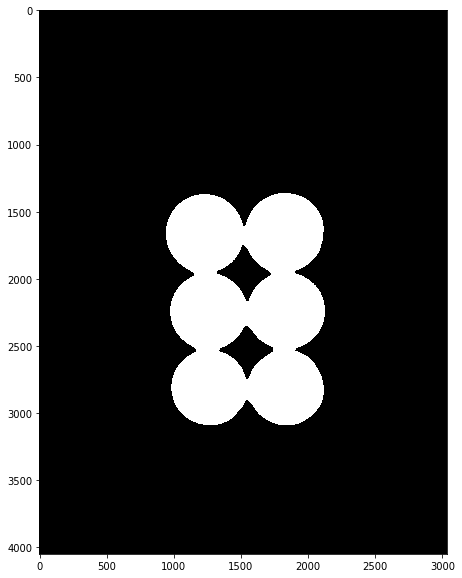

In [39]:
display(opening)

In [37]:
sure_bg = cv2.dilate(opening, kernel, iterations=3)

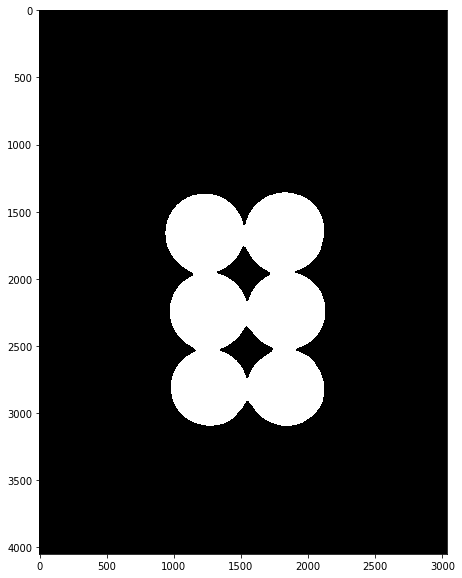

In [38]:
display(sure_bg)

### Apply distance Transform

In [27]:
dist_transform = cv2.distanceTransform(opening, cv2.DIST_L2, 5)

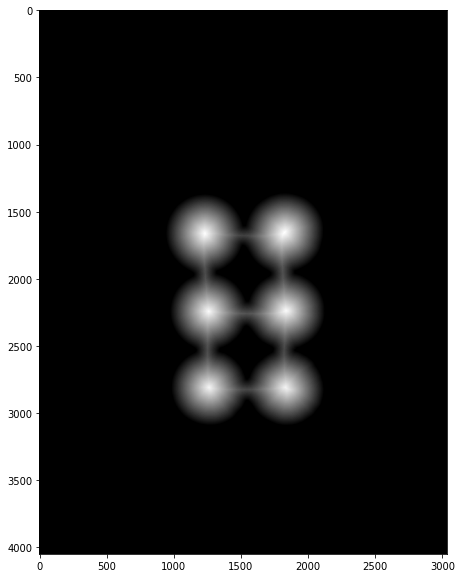

In [28]:
display(dist_transform)

In [29]:
ret, sure_fg = cv2.threshold(dist_transform, 0.7*dist_transform.max(), 255, 0)

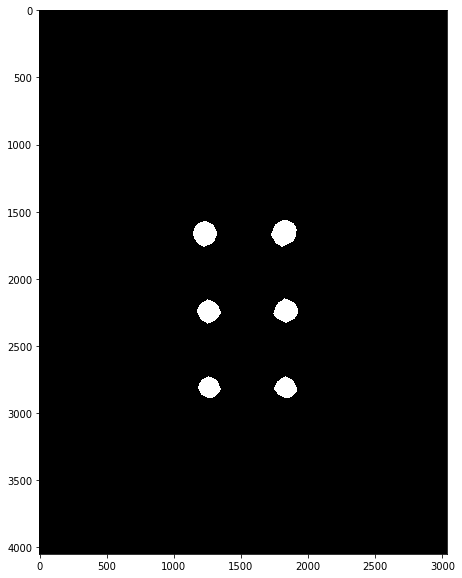

In [30]:
display(sure_fg)

In [40]:
# Find the unknown region
sure_fg = np.uint8(sure_fg)

In [41]:
unknown = cv2.subtract(sure_bg, sure_fg)

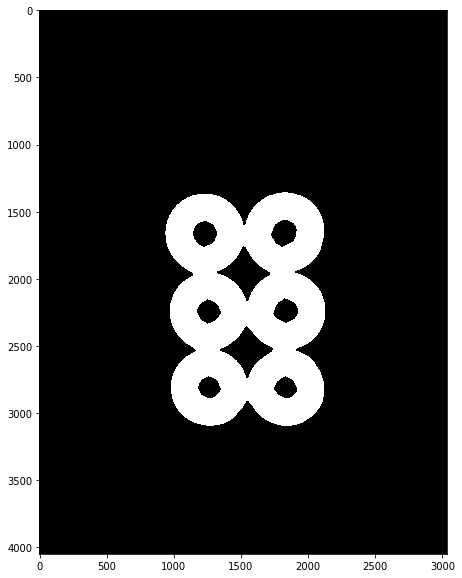

In [42]:
display(unknown)

In [43]:
# Create the label marker for watershed algorithm
ret, markers = cv2.connectedComponents(sure_fg)

In [44]:
markers

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [45]:
markers = markers + 1

In [46]:
markers[unknown==255] = 0

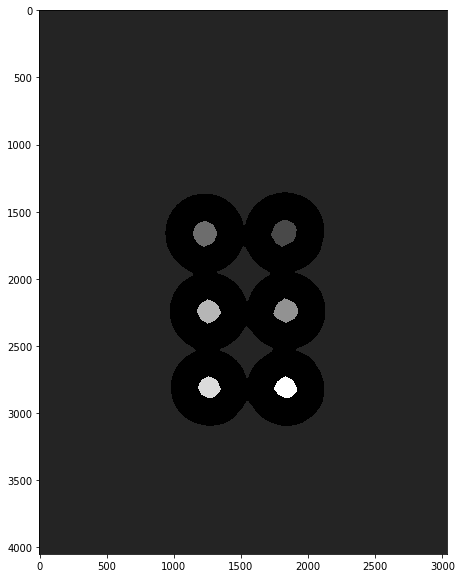

In [47]:
display(markers)

In [48]:
markers = cv2.watershed(img, markers)

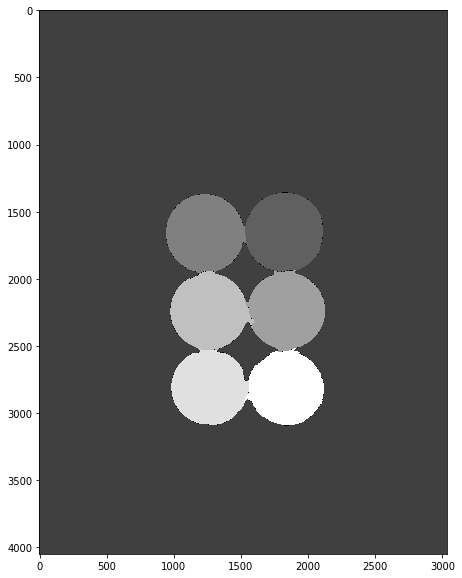

In [49]:
display(markers)

In [54]:
image, contours, hierarchy = cv2.findContours(markers.copy(), cv2.RETR_CCOMP, cv2.CHAIN_APPROX_SIMPLE)

In [55]:
for i in range(len(contours)):
    if hierarchy[0][i][3] == -1:
        cv2.drawContours(sep_coins, contours, i, (255,0,0), 10)

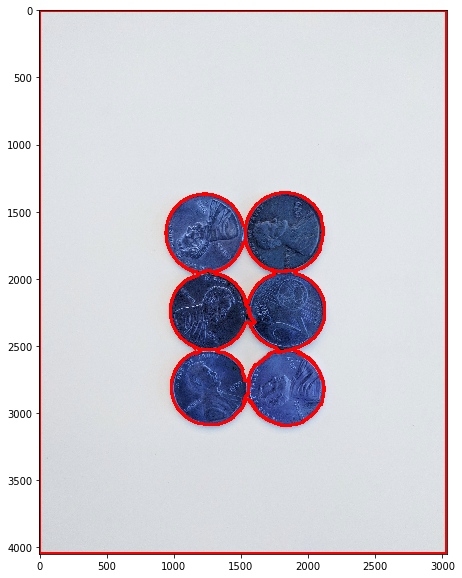

In [56]:
display(sep_coins)